In [1]:
import os 
from ipsl_dcpp.model.ipsl_dataset import IPSL_DCPP
import lightning.pytorch as pl
import torch
import hydra
import numpy as np
from hydra import compose, initialize
from omegaconf import OmegaConf,DictConfig
import datetime
import matplotlib.pyplot as plt
import xarray as xr
from celluloid import Camera
import datetime
import subprocess
import sys

In [2]:
import os
from hydra import compose, initialize
from omegaconf import OmegaConf


with initialize(version_base=None, config_path="conf"):
    cfg = compose(config_name="config",overrides=["experiment=one_month_multiple_variable_v100"])


In [3]:
scratch = os.environ['SCRATCH']
work = os.environ['WORK']

run_id = cfg.run_id
out = subprocess.run(f'ls -tr {scratch}/checkpoint_{run_id}/ | tail -n 1',shell=True,capture_output=True,text=True)
path = out.stdout.strip("\n")
print(path)
checkpoint_path = f'{scratch}/checkpoint_{run_id}/{path}'
checkpoint = torch.load(checkpoint_path,map_location=torch.device('cpu'))
test = IPSL_DCPP('test',lead_time_months=1,surface_variables=cfg.experiment.surface_variables,depth_variables=cfg.experiment.depth_variables)
test_dataloader = torch.utils.data.DataLoader(test,batch_size=1,shuffle=False,num_workers=1)
model = hydra.utils.instantiate(cfg.experiment.module,backbone=hydra.utils.instantiate(cfg.experiment.backbone),dataset=test_dataloader.dataset)
model.load_state_dict(checkpoint['state_dict'])


epoch=01.ckpt


/gpfsdswork/projects/rech/mlr/udy16au/miniconda3/envs/env_gpu5/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/gpfsdswork/projects/rech/mlr/udy16au/miniconda3/envs/env_gpu5/lib/python3.11/site-packages/torch/functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3526.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


<All keys matched successfully>

In [4]:
import glob

files = list(glob.glob(f'{scratch}/*.nc'))

test_files = [str(x) for x in files if any(substring in x for substring in [str(x) for x in list(range(2012,2017))])]
timestamps = []
for fid, f in enumerate(test_files):
    with xr.open_dataset(f) as obs:
        var_id = f.split('.')[0][-1]
        file_stamps = [(fid, i, t,var_id) for (i, t) in enumerate(obs.time.to_numpy())]
        #if doing autoregressive - don't include the last -leadtime- amount of each timeseries to avoid indexing overflow issues
        timestamps.extend(file_stamps[:-(1+1)])
        #self.timestamps.extend(file_stamps)
timestamps = sorted(timestamps, key=lambda x: x[-1]) # sort by timestamp
id2pt = {i:(file_id, line_id,var_id) for (i, (file_id, line_id, var_id,s)) in enumerate(timestamps)}

(120,)
(120,)
(120,)
(120,)
(120,)
(120,)
(120,)
(120,)
(120,)
(120,)
(120,)


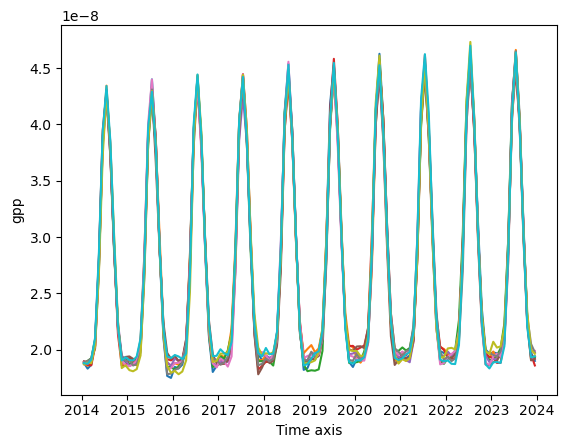

In [6]:
total_mean = []
for file in test_files:
    if('2013' in file):
        ds = xr.open_dataset(file)
        total_mean.append(ds['gpp'].mean(dim=('lat','lon')))
        ds['gpp'].mean(dim=('lat','lon')).plot()

ds_np = np.stack(total_mean).mean(axis=0)
adjusted_ts = []
for file in test_files:
    if('2013' in file):
        ds = xr.open_dataset(file)
        print(ds['gpp'].mean(dim=('lat','lon')).data.shape)
        adjusted_ts.append(ds['gpp'].mean(dim=('lat','lon')).data - ds_np)

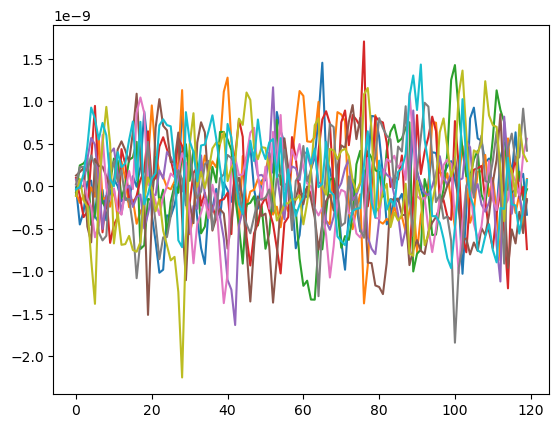

In [7]:
import matplotlib.pyplot as plt 
for i in range(10):
    plt.plot(adjusted_ts[i].T)

In [1]:
import numpy as np

In [11]:
clima = np.load('climatology_surface_means.npy')
clima = np.expand_dims(clima,axis=(1,2))

In [17]:
import torch 
t1 = torch.zeros([1,91,143,144])

In [18]:
t1 * clima

ValueError: operands could not be broadcast together with shapes (1,91,143,144) (12,1,1,91) 

In [2]:
import numpy as np 
x = np.load('data/depth_delta_std.npy')

In [4]:
x + 1e-20

array([[[[1.e-20, 1.e-20, 1.e-20, ..., 1.e-20, 1.e-20, 1.e-20],
         [1.e-20, 1.e-20, 1.e-20, ..., 1.e-20, 1.e-20, 1.e-20],
         [1.e-20, 1.e-20, 1.e-20, ..., 1.e-20, 1.e-20, 1.e-20],
         ...,
         [1.e-20, 1.e-20, 1.e-20, ..., 1.e-20, 1.e-20, 1.e-20],
         [1.e-20, 1.e-20, 1.e-20, ..., 1.e-20, 1.e-20, 1.e-20],
         [1.e-20, 1.e-20, 1.e-20, ..., 1.e-20, 1.e-20, 1.e-20]],

        [[1.e-20, 1.e-20, 1.e-20, ..., 1.e-20, 1.e-20, 1.e-20],
         [1.e-20, 1.e-20, 1.e-20, ..., 1.e-20, 1.e-20, 1.e-20],
         [1.e-20, 1.e-20, 1.e-20, ..., 1.e-20, 1.e-20, 1.e-20],
         ...,
         [1.e-20, 1.e-20, 1.e-20, ..., 1.e-20, 1.e-20, 1.e-20],
         [1.e-20, 1.e-20, 1.e-20, ..., 1.e-20, 1.e-20, 1.e-20],
         [1.e-20, 1.e-20, 1.e-20, ..., 1.e-20, 1.e-20, 1.e-20]],

        [[1.e-20, 1.e-20, 1.e-20, ..., 1.e-20, 1.e-20, 1.e-20],
         [1.e-20, 1.e-20, 1.e-20, ..., 1.e-20, 1.e-20, 1.e-20],
         [1.e-20, 1.e-20, 1.e-20, ..., 1.e-20, 1.e-20, 1.e-20],
        